In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [4]:
df = pd.DataFrame({'beta':np.random.beta(5,1,1000)*60,
                   'exponential':np.random.exponential(10,1000),
                   'normal_p':np.random.normal(10,2,1000),
                   'normal_l': np.random.normal(10,10,1000),
                  })
  

In [6]:
# Thêm dữ liệu được tạo theo phân phối nhị thức
fist_half = np.random.normal(20,3,500)
second_half = np.random.normal(-20,3,500)
bimodal = np.concatenate([fist_half,second_half])
df['bimodal']= bimodal
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,51.204776,5.495512,7.223089,18.939263,20.471600
1,54.948526,3.998947,8.343346,-9.627726,21.981009
2,52.593488,2.952217,9.690292,7.974896,25.729570
3,56.887934,4.264795,9.890492,13.015301,18.880001
4,50.194501,6.764255,7.540950,12.381182,19.488938


<AxesSubplot:ylabel='Density'>

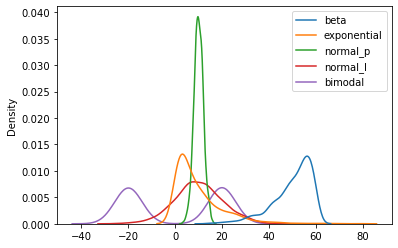

In [7]:
# Trực quan hóa dữ liệu
sns.kdeplot(data=df)

<AxesSubplot:>

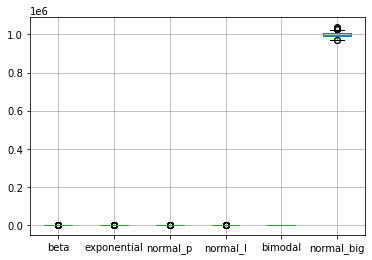

In [27]:
df.boxplot()

In [8]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.146072,9.768376,10.039617,10.062877,0.070343
std,8.375529,10.244282,1.982806,10.195528,20.173688
min,14.880860,0.003464,3.404298,-25.187553,-28.654816
25%,46.082086,2.575778,8.765021,3.707264,-20.055629
50%,52.398598,6.354106,10.004723,9.797409,-0.205251
75%,56.480551,13.348153,11.386518,16.471100,19.808043
max,59.988415,78.118806,15.903103,51.717075,27.801776


<AxesSubplot:ylabel='Density'>

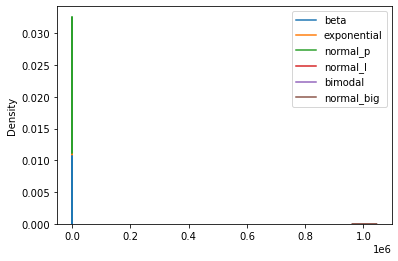

In [10]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

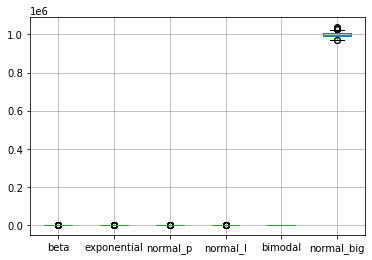

In [12]:
df.boxplot()

Chuẩn hóa dữ liệu


In [15]:
scaler = RobustScaler()
df_s =scaler.fit_transform(df)
col_names =list(df.columns)
df_s= pd.DataFrame(df_s,columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.114808,-0.079703,-1.061086,0.716231,0.518689,-0.855765
1,0.245222,-0.218629,-0.633751,-1.521888,0.556553,-0.208886
2,0.018742,-0.315797,-0.119943,-0.142787,0.650588,-0.644021
3,0.431731,-0.193951,-0.043575,0.252110,0.478763,0.801679
4,-0.211964,0.038074,-0.939834,0.202429,0.494039,-0.065091


<AxesSubplot:ylabel='Density'>

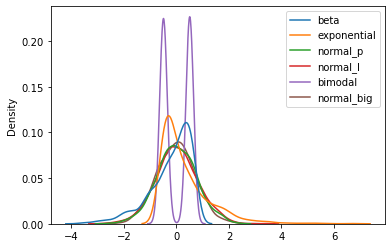

In [17]:
sns.kdeplot(df_s)

In [19]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,-0.216621,3.169469e-01,1.331051e-02,2.079841e-02,0.006913,-0.014630
std,0.805458,9.509771e-01,7.563640e-01,7.987824e-01,0.506067,0.730506
min,-3.608008,-5.895303e-01,-2.517808e+00,-2.740944e+00,-0.713671,-2.280439
25%,-0.607447,-3.507423e-01,-4.728986e-01,-4.771407e-01,-0.497957,-0.532934
50%,0.000000,4.119968e-17,3.387048e-16,-6.949736e-17,0.000000,0.000000
75%,0.392553,6.492577e-01,5.271014e-01,5.228593e-01,0.502043,0.467066
max,0.729898,6.661920e+00,2.250004e+00,3.284253e+00,0.702570,2.789087


<AxesSubplot:>

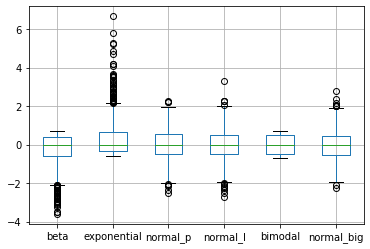

In [21]:
df_s.boxplot()

In [23]:
# lấy giá trị min mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.6080076339659812,
 -0.5895302685255686,
 -2.517807681242787,
 -2.7409440979825255,
 -0.7136714796046463,
 -2.2804385690374835]

In [25]:
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.7298978211876092,
 6.661920071198182,
 2.250004381964971,
 3.2842528165815934,
 0.7025701774329831,
 2.7890866797359464]

In [26]:
# median
scaler.center_

array([ 5.23985983e+01,  6.35410554e+00,  1.00047232e+01,  9.79740917e+00,
       -2.05251112e-01,  9.99723085e+05])